# Newton's Foward Difference Interpolating Polynomials

Name : Mukesh Tiwari
Date : 03/04/2022

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
#input data

xval = [0.1 , 0.2 , 0.3 , 0.4 , 0.5]

#yval = np.e**xval
yval = [1.50 , 2.35 , 4.47 , 3.08 , 5.07] 

In [14]:
xval

[0.1, 0.2, 0.3, 0.4, 0.5]

In [15]:
yval

[1.5, 2.35, 4.47, 3.08, 5.07]

In [16]:
#defining constants

h = xval[1] - xval[0]   
n = len(yval)
h

0.1

In [30]:
#Implementing forward differnce operator

def fdiff(y, n ,i):
    if n == 0:
        return y[i]
    
    return fdiff(y,n-1,i+1) - fdiff(y,n-1,i)

In [32]:
def compute1_y(x_val , y_val , x):
    p = x - x_val[0] / (x_val[1] - x_val[0])
    ans = fdiff(y_val,0,0)
    prod = p
    for i in range(1 , len(y_val)):
        print(ans)
        ans = ans + (fdiff(y_val,i,0) / math.factorial(i))
        prod = prod * (p - i)
    return ans

In [33]:
compute1_y(xval , yval , 0.15)

1.5
2.35
2.985
2.1883333333333335


2.6745833333333335

In [18]:
#implementing D

def d(x,i):
    ans = 1
    for j in range(0,i):
        ans = ans * (x - xval[j])
    return ans
    

In [19]:
d(0,3)

-0.006000000000000001

In [20]:
#Implementing p for a
def p(i):
    ans = 1
    for j in range(0,i):
        ans = ans * (p - j)
    return ans

In [21]:
def coeff(y):
    n = len(y)
    c = []
    for i in range(0,n):
        c.append(fdiff(y,i,0) / (math.factorial(i) * h**i))
    return c

In [22]:
def pol(coeff , x):
    val = 0
    for i in range(0,n):
        val = val + coeff[i] * d(x,i)
    return val

In [27]:
co = coeff(yval)
co


[1.5, 8.5, 63.499999999999964, -796.6666666666663, 4862.499999999999]

In [28]:
pol(co,0.15)

1.011640625

<IPython.core.display.Javascript object>


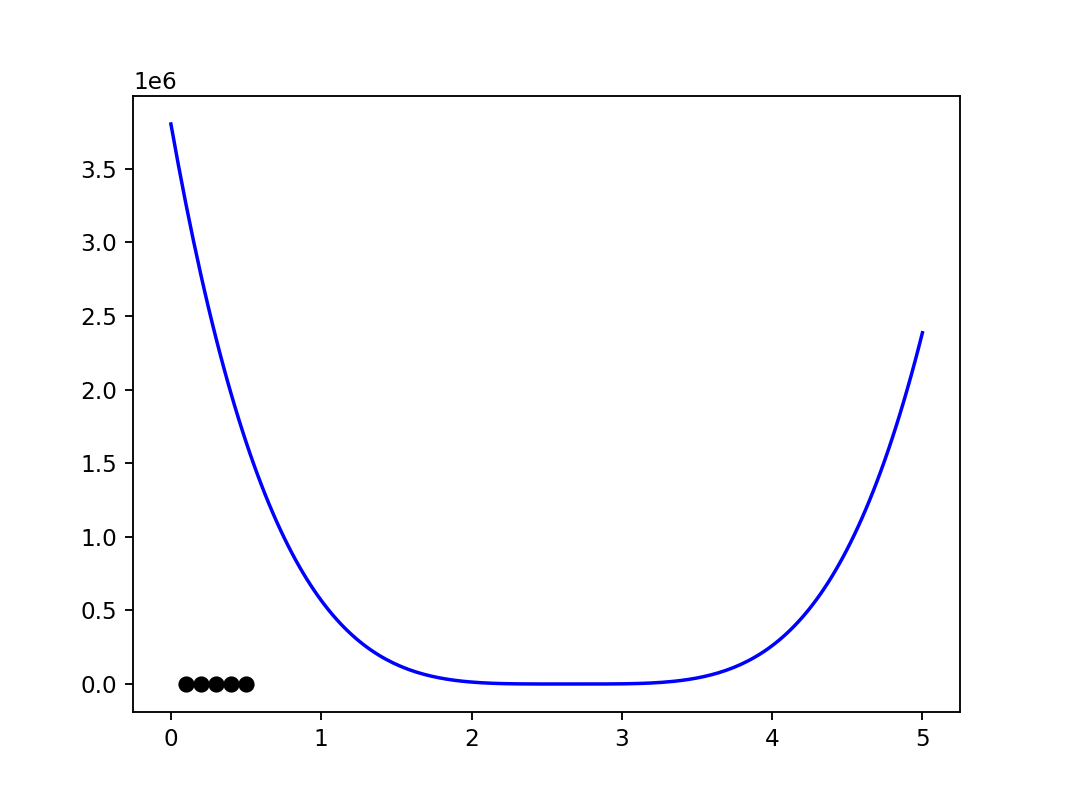

In [29]:
pval = [pol(co , i) for i in np.linspace(-5,5,200)]
fig , ax = plt.subplots()
ax.plot(xval,yval , 'ko')
ax.plot(np.linspace(0,5,200), pval , 'blue')

fig.show()